## Important todos

[ In Progress ] Retraining again but with the same as before, to see stochasticity with all the same arguments

## Non-important todos

Retraining with seed 3 to see if trends are correct

Could try comparing the order of magintude accross different ones?

In [2]:
from utils import vis, dfuncs
import math
import pandas as pd
import numpy as np

# 1. Are the retraining values somewhat correlated?

### A: Yes, not perfectly, but somewhat


The predictions are not at all. However, it seems like usually either one or the other is close by? But why one or other? maybe cause of scales it just looks close to zero? Though all the scales are crazy


tenth-0 is the best, though it gets messed up near the end...



Note that a limitation of the retraining ones is that its not necc the same test instance when you test accross multiple ones. Honestly same when you re-do the same one when retraining........


Oh this could be an issue. Should I re-do where dont randomly get training? Probably. 
- step 1: Check that its selecting random test images to get (though its for influences!!!)
- Step 2: see if it saves the indexes...
- 


Maybe so it always does the same, make one function and just have condition for if do retarining?


Though right now its kind of ok because theyre on such different scales it doesnt really matter... but will be issue eventually, should make consistent



THE PLAN
[ ]  First. Set up a new folder where clone the current version of the github. make sure to change any sys pathways! And regenerate with div10? Or should I not focus on this because we can look at the clam stuff first? Yeah do clam stuff first

[ X ] Second. Make it one function (keep the old one just for safekeeping) that takes in an argument for if it should retrain or not. Then also make it so that it checks the same training idxs. I made it so it checks the same training idxs, but tbh its getting very different numbers even for the same training idxs so... Though a non-insignificant amount are ranked the same. Like 6/10 of the highest influential are the same.

- Third. Check in on clam. See if its in the right order of magnitude, and see if the two already generated ones are similar. Then, move files to diferent name and run again. That way can see if its supposed to be consistent

- Fourth. See if the rankings are consistent across different instantiations. Maybe just func for getting the percentage of the top X that is the same idxs? Instead of the raking shenanigans for now

- Fifth. see if get same predictions when load hvp again! so like copy folder and then rerun

- Sixth. check on test5 if i fucked anything up making it one test value

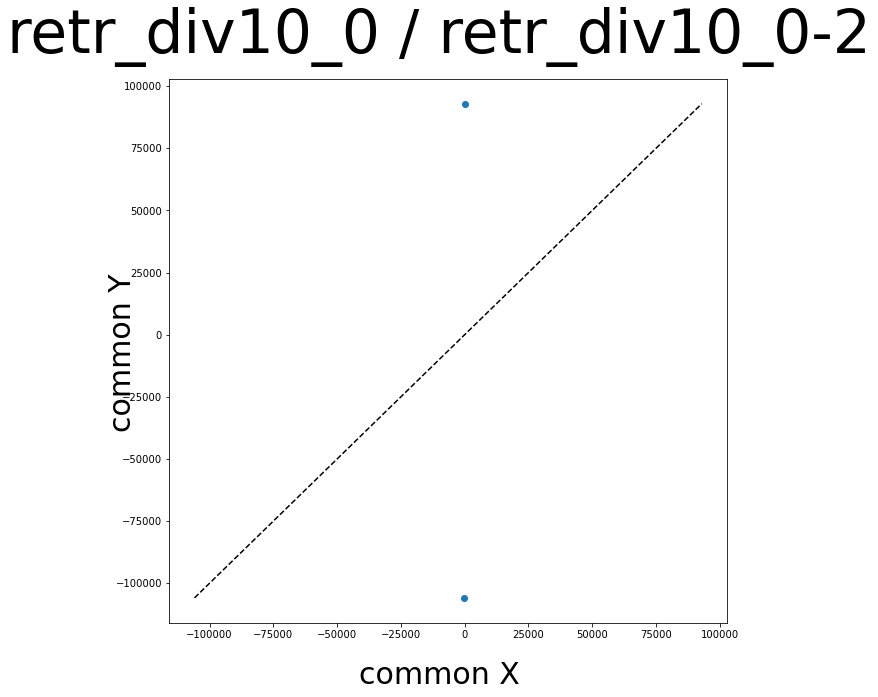

<Figure size 432x288 with 0 Axes>

In [7]:
# make condition = 1 if show actual retraining values, 0 if show predictions
cond = 0
idx_range = 1

if True:
    file_pairs = [
        #('retr_div10_9', 'retr_div10_0', True, True),
        #('retr_div10', 'retr_div10_0', True, True),
        #('retr_div10', 'retr_div10_9', True, True),
        #('tenth-0', 'retr_div10_0', False, True),
        #('retr_div10', 'retr_div10_0', True, True),
        #('tenth-0', 'retr_div10', False, True),
        #('tenth-0', 'retr_div10', False, True),
        ('retr_div10_0', 'retr_div10_0-2', True, True),
    ]


    for f1, f2, r1, r2 in file_pairs:
        data1 = dfuncs.getQQplotData(f1=f1, f2=f1, idx_range=idx_range, retrained=r1)
        data2 = dfuncs.getQQplotData(f1=f2, f2=f2, idx_range=idx_range, retrained=r2)

        new_data = []
        for x, y in zip(data1, data2):
            new = (x[cond], y[cond])
            new_data.append(new)

        cfgs = vis.getConfigs(size=10, qq=True)
        cfgs['title'] = '%s / %s' % (f1, f2)
        cfgs['xlabel'] = f1
        cfgs['ylabel'] = f2

        vis.graph('qq', new_data, cfgs)


# Suspicions confirmed. Its doing 

Maybe make a 3rd time. Just to make sure -2 and -3 are alos not correlated


This makes no freaking sense. Especially when you consider that tenth was mostly fine. Like it had been doing fine enough at first, then something messed it up. So the timeline (simplified) is

tenth --> Works for the most part.
retraining-tenth --> works for the most part
full/one/divisors --> Did not work
tenth-0 --> Works ish for the most part
retr_div10 --> Does not work
div10 --> Does not work
div10 random seed 0 --> Does not work
div10 random seeds other --> Don't work, and is all different
retr_div10 with various seeds --> Does different each time
redoing the same arguments --> gives different results


So its starting to seem almost entirely random.. but that doesnt explain why it had been working before.... Like it was decent enough divided by 10 before

I could try cloning from the github yet again and re-doing. Then see if its the same as tenth-0. Use exactly the same arguments. If it works, can compare between the two
- Be careful with folders that are hardcoded!!!!

One potential issue is that arguments I had used wont work anynore byt can do. somethign similar
Another potential issue is that it was making the different diisors code that made the difference? Idk but i may have to revert to a different commit


So
Question 1: If I use a prior version of the code, can I re-create stuff and get consistently ok results?
Question 2: Is it actually random or is there any correlation?
Question 3: Is it supposed to be consistent? If I run on clam, do I get consistent results? 


# 3. Is it supposed to be consistent? If I run on clam, do I get consistent results?

Ok I have 3 and 10 from before. I will copy them over, and then regenereate

# When training idxs removed are same, how does it correlate?

There is a decent amount of overlap between which indexs are most influential. However, the magnitudes are wildddd. SOmetimes. Sometimes within 2-3 orders of magnitude of one another. though thats still pretty bad

In [23]:
f1 = 'retr_div10_0'
f2 = 'retr_div10_9'


In [29]:
for testidx in range(10):
    print()
    print(testidx, '/'*50)
    info0 = dfuncs.loadRetraining(f1, testidx, return_idxs=True)
    info1 = dfuncs.loadRetraining(f2, testidx, return_idxs=True)

    idxs0 = info0['train_idxs']
    idxs1 = info1['train_idxs']

    pred0 = info0['predicted_loss_diffs']
    pred1 = info1['predicted_loss_diffs']

    act0 = info0['actual_loss_diffs']
    act1 = info1['actual_loss_diffs']

    common_idxs = []

    for i in range(len(idxs0)):
        i0 = idxs0[i]
        if i0 in idxs1:
            common_idxs.append((i0, i, idxs1.index(i0)))

    for num, i0, i1 in common_idxs:
        p0 = pred0[i0]
        p1 = pred1[i1]
        a0 = act0[i0]
        a1 = act1[i1]

        print()
        print(num)
        print(' '*4, 'P0: ', p0)
        #print(' '*4, 'A0: ', a0)
        print(' '*4, 'P1: ', p1)
        #print(' '*4, 'A1: ', a1)


0 //////////////////////////////////////////////////

2962
     P0:  -134.339970301029
     P1:  -741.008760169527

247
     P0:  137.4054561536307
     P1:  794.4680469618592

3978
     P0:  -141.6651360735541
     P1:  -676.8225341303437

227
     P0:  167.7268468958004
     P1:  975.4237900738668

896
     P0:  -200.05683964970538
     P1:  -815.9576765827632

624
     P0:  -234.82831115907896
     P1:  -679.8550835873046

1 //////////////////////////////////////////////////

1708
     P0:  104653205.7799304
     P1:  45305.4308430595

78
     P0:  120642929.94166468
     P1:  61910.27458137261

624
     P0:  132965141.27060552
     P1:  48296.89073375583

2 //////////////////////////////////////////////////

4302
     P0:  -0.2703603482014534
     P1:  -0.008148025474957453

876
     P0:  -0.2729967070483435
     P1:  -0.008363625293579568

896
     P0:  -0.3064021671751044
     P1:  -0.009567543330611298

1044
     P0:  0.3708370915899195
     P1:  0.010496960721799417

972
     

# Are rankings consistent across pairs? 

- Fourth. See if the rankings are consistent across different instantiations. Maybe just func for getting the percentage of the top X that is the same idxs? Instead of the raking shenanigans for now




In [30]:
# make condition = 1 if show actual retraining values, 0 if show predictions
cond = 0
idx_range = 1

if False:
    file_pairs = [
        #('retr_div10_9', 'retr_div10_0', True, True),
        #('retr_div10', 'retr_div10_0', True, True),
        #('retr_div10', 'retr_div10_9', True, True),
        #('tenth-0', 'retr_div10_0', False, True),
        #('retr_div10', 'retr_div10_0', True, True),
        #('tenth-0', 'retr_div10', False, True),
        #('tenth-0', 'retr_div10', False, True),
        ('retr_div10_0', 'retr_div10_0-2', True, True),
    ]


    for f1, f2, r1, r2 in file_pairs:
        data1 = dfuncs.getQQplotData(f1=f1, f2=f1, idx_range=idx_range, retrained=r1)
        data2 = dfuncs.getQQplotData(f1=f2, f2=f2, idx_range=idx_range, retrained=r2)

        new_data = []
        for x, y in zip(data1, data2):
            new = (x[cond], y[cond])
            new_data.append(new)

        cfgs = vis.getConfigs(size=10, qq=True)
        cfgs['title'] = '%s / %s' % (f1, f2)
        cfgs['xlabel'] = f1
        cfgs['ylabel'] = f2

        vis.graph('qq', new_data, cfgs)


In [4]:
def inAllLists(i, lsts):
    for lst in lsts:
        if i not in lst:
            return False
        
    return True

In [5]:
folders = [('tenth-9', False), ('tenth-0', False)]
#folders = [('retr_div10_9-2', True), ('retr_div10_9-3', True), ('retr_div10_9', True)]
folders = [('div10', False), ('tenth-0', False)]
folders = [('div10', False), ('tenth-0', False)]
largest = True
num_idxs = 100


common = {}
for testidx in range(10):
    idx_lsts = []
    
    for f, retr in folders:
        if retr:
            info = dfuncs.loadRetraining(f, testidx, return_idxs=True)
            idxs = info['train_idxs']
        else: 
            preds = dfuncs.loadPreds(f, testidx)
            idxs = dfuncs.getExtremeIdxs(preds, largest=largest, num=num_idxs)
        idx_lsts.append(idxs)
        
    common_idxs = []
    for i in idxs:
        if inAllLists(i, idx_lsts):
            common_idxs.append(i)
    
    print(testidx, len(common_idxs))

0 22
1 23
2 27
3 26
4 28
5 27
6 29
7 35
8 27
9 32


### Interesting things of note

1. there seem to be a lot of overlap accross different testing images. of training that is generally a lot over time


2. There seems to be more overlap between retraining-0 and retraining-9 than between normal-0 and normal 9. And about the same amount between the same retraining-0 * 2

# Clam same or different


Might have a problem because different indices... but can at least see if the same type of everything


TODO: do an index where its load_mnist not small, and see if its in the same range
- Do 2 idxs and do 1 twice (can't at same time because of the way it saves). Want to see diff between eachother, if its in the right range, and then also if similar or different from curr Lets do 3

OYYYYYY OK SO THIS IS DOING EVERYTHING EXACTLY THE SAME!!! and also the right 

Ok so its something I did that has messed things up :) Bad news but also better news


In [14]:
def loadClam(idx, version):
    path = "../output/mnist/clamtest/preds-%s-v%s.npz" % (idx, version)
        
    data = np.load(path, allow_pickle=True)
    lst = data.files
    
    stuff = {}

    for item in lst:
        stuff[item] = list(data[item])

    return stuff

In [28]:
test_idx = 10

p2 = loadClam(test_idx, 2)
p1 = loadClam(test_idx, 1)

print(p1['indices_to_remove'][-5:])
print(p2['indices_to_remove'])

print(p1['predicted_loss_diffs'][-5:])
print(p2['predicted_loss_diffs'])

[4458, 4643, 1505, 4938, 4746]
[4458, 4643, 1505, 4938, 4746]
[-4.179528897458857e-05, 4.186184026978233e-05, -4.409015720540827e-05, 4.720093987204812e-05, 5.376612056385387e-05]
[-4.179528897458857e-05, 4.186184026978233e-05, -4.409015720540827e-05, 4.720093987204812e-05, 5.376612056385387e-05]


In [26]:
for i in p1:
    print(i)

test_idx
indices_to_remove
predicted_loss_diffs
